In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random
pd.options.mode.chained_assignment = None  # default='warn'

###############################################################################
# Function for K_means clustering 
###############################################################################

def K_means(cust_data, no_of_clusters = 4, iter_count = 10):
    
    rows, columns =  cust_data.shape 
    cluster_centers = random.sample(list(cust_data), no_of_clusters)
    clus_cent_iter = []
    cluster_colour = [[] for _ in range(no_of_clusters)]
    
    for i in range(iter_count): 
        cluster_assign = []
        clus_cent_iter.append(cluster_centers)
        
        for j in range(rows): 
            dist_vec = np.zeros((no_of_clusters, 1))
            
            # Computing Euclidian distance
            for k in range(no_of_clusters): 
                dist_vec[k] = np.sum(np.square(cust_data[j, :] - cluster_centers[k]))
                
            cluster_assign.append(np.argmin(dist_vec))
            
        new_mean_clus = []
       
        # Computing mean of data points belonging to mth cluster
        for m in range(no_of_clusters):
            cust_m = np.array([cust_data[p] for p, e in enumerate(cluster_assign) if e == m])
            new_mean_clus.append(np.mean(cust_m, axis = 0))
        
        # Condition for convergence   
        if np.array(cluster_centers).all() == np.array(new_mean_clus).all(): 
            break
        else: 
            cluster_centers = new_mean_clus
   
    # Segregating Clusters
    for i in range(rows):
        k = int(cluster_assign[i])
        cluster_colour[k].append(cust_data[i,:])
    
     
    return cluster_centers, cluster_assign, clus_cent_iter, cluster_colour

###############################################################################
# Plotting data with cluster center                                                             
###############################################################################

def K_plot(cluster_colour, cluster_centers, no_of_clusters): 
        
    fig_K_plot = plt.figure()
    ax = fig_K_plot.add_subplot(111, projection='3d')
    
    for i in range(no_of_clusters):
        cust_data = np.array(cluster_colour[i])
        cluster_centers = np.array(cluster_centers)
                
        x_cust_data = list(cust_data[:,1])
        y_cust_data = list(cust_data[:,2])
        z_cust_data = list(cust_data[:,3])
        
        x_cluster_centers = list(cluster_centers[:,1])
        y_cluster_centers = list(cluster_centers[:,2])
        z_cluster_centers = list(cluster_centers[:,3])
                       
        ax.scatter(x_cust_data, y_cust_data, z_cust_data, marker='o')
    
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income')
    ax.set_zlabel('Credit Score')   
        
    ax.scatter(x_cluster_centers, y_cluster_centers, z_cluster_centers, s = 80, c = 'black', marker = 'X' )    
    plt.show()                                                         

###############################################################################      
#Plotting 3D Plot for Age vs Annual Income vs Credit Score 
###############################################################################

def plot_3D(cust_data): 
    
    fig_cust_data = plt.figure()
    ax = fig_cust_data.add_subplot(111, projection='3d')
    
    x_cust_data = list(cust_data[:,1])
    y_cust_data = list(cust_data[:,2])
    z_cust_data = list(cust_data[:,3])
    
    ax.scatter(x_cust_data, y_cust_data, z_cust_data, c='r', marker='o')
    
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income')
    ax.set_zlabel('Credit Score')

    plt.show()

###############################################################################
# MAIN CODE
###############################################################################

# Reading csv file


customer_data = pd.read_csv("Mall_Customers.csv")

#NOTE : The path of the csv file may vary 
# Seperating list based on gender

for i in range(len(customer_data['Gender'])):
    if customer_data['Gender'][i]=='Male':
        customer_data['Gender'][i] = 1
    else:
        customer_data['Gender'][i] = 0

# Removing Customer ID       
customer_data = customer_data.to_numpy()[:,1:5]

male = []
female = []

# Assigning 0 to Female and 1 to Male
for i in range(len(customer_data[:,0])):
   
    if customer_data[i,0] == 1:
        male.append(customer_data[i,:])
    else:
        female.append(customer_data[i,:])
   
# Converting list to numpy arrays

male = np.array(male)  
female = np.array(female) 

# Pie Chart for Gender Distribution
Gender = ['Male', 'Female'] 
  
data = [len(male), len(female)] 
  



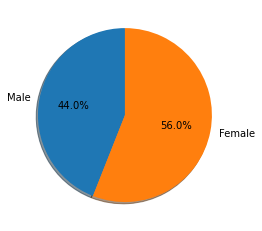

In [2]:
# Creating plot 
fig = plt.figure() 

plt.pie(data, labels = Gender, autopct='%1.1f%%',
        shadow=True, startangle=90) 
  
# show plot 
plt.show() 


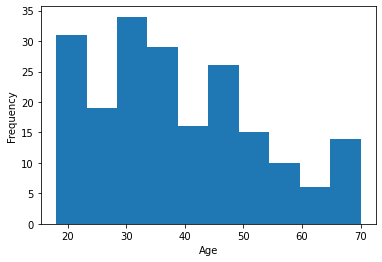

In [3]:
# Histogram for Age Visualization
fig = plt.figure()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(customer_data[:,1], 10)
plt.show()

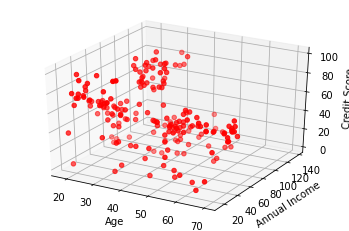

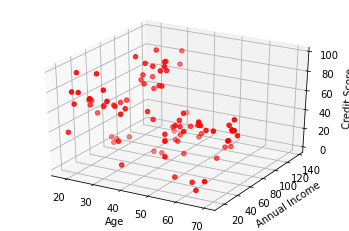

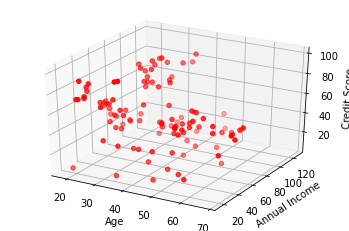

In [4]:
plot_3D(customer_data)
plot_3D(male)
plot_3D(female)

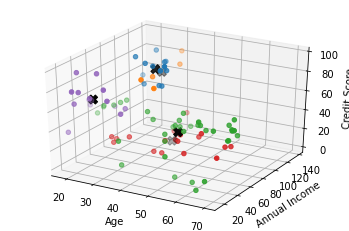

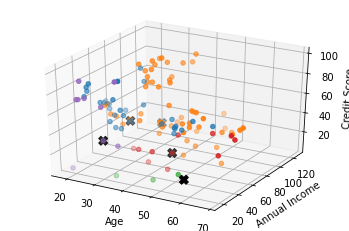

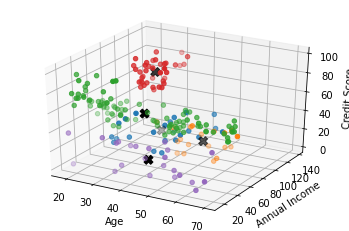

In [5]:
# K_means Algorithm

no_of_clusters = 5

cluster_centers_male, cluster_assign_male, clus_cent_iter_male, cluster_colour_male = K_means(male, no_of_clusters) 
cluster_centers_female, cluster_assign_female, clus_cent_iter_female, cluster_colour_female = K_means(female, no_of_clusters) 
cluster_centers_all, cluster_assign_all, clus_cent_iter_all, cluster_colour_all = K_means(customer_data, no_of_clusters)

#Plotting clusters and centers
K_plot(cluster_colour_male, cluster_centers_male, no_of_clusters)
K_plot(cluster_colour_female, cluster_centers_female, no_of_clusters)
K_plot(cluster_colour_all, cluster_centers_all, no_of_clusters)

###############################################################################